## positive graph

1. import full directed network: article_pos1.gml
2. save as undirected network: u_pos.gml

- save u_nodes_pos.csv
- save u_Gc_positive.gml
- save u_Gc_nodes_pos.csv

# 1.

In [1]:
# 1_network_df

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from glob import glob

plt.style.use('ggplot')
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

gml_files = glob('../output/network/article_pos1.gml')

In [2]:
def calculate_graph_inf(graph):
    graph.name = filename
    info = nx.info(graph)
    print info

def highest_centrality(cent_dict):
    """Returns a tuple (node,value) with the node
    with largest value from centrality dictionary."""
    # create ordered tuple of centrality data
    cent_items = [(b,a) for (a,b) in cent_dict.iteritems()]
    # sort in descending order
    cent_items.sort()
    cent_items.reverse()
    return tuple(reversed(cent_items[0]))

---
# 2. convert to undirected

In [3]:
for graph_num, gml_graph in enumerate(gml_files):
    dgraph = nx.read_gml(gml_graph)
    ugraph = dgraph.to_undirected() # to undirected graph
    U = dgraph.to_undirected(reciprocal=True)
    e = U.edges()
    ugraph.add_edges_from(e)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(dgraph)
    calculate_graph_inf(ugraph)

----------
../output/network/article_pos1.gml
Name: article_pos1.gml
Type: MultiDiGraph
Number of nodes: 652
Number of edges: 1140
Average in degree:   1.7485
Average out degree:   1.7485
Name: article_pos1.gml
Type: MultiGraph
Number of nodes: 652
Number of edges: 1140
Average degree:   3.4969


In [4]:
# save undirected gml
#nx.write_gml(ugraph, "../output/network/u_pos.gml")

dgraph = directed
ugraph = undirected

# undirected graph

In [5]:
# load
gml_files = glob('../output/network/u_pos.gml')

In [6]:
# ugraph = undirected; dgraph = directed
for graph_num, gml_graph in enumerate(gml_files):
    ugraph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(ugraph)

----------
../output/network/u_pos.gml
Name: u_pos.gml
Type: MultiGraph
Number of nodes: 652
Number of edges: 1140
Average degree:   3.4969


---
# 3. all nodes table

In [7]:
# 2_node_df: list all nodes and centrality
data_columns = ['name',
                'sentiment'
                ]
data = pd.DataFrame(columns = data_columns)
combined_df = pd.DataFrame()

In [8]:
# calculate variables and save into list
sent = "positive"    
deg_cent = nx.degree_centrality(ugraph)
bet_cent = nx.betweenness_centrality(ugraph)
clo_cent = nx.closeness_centrality(ugraph)
graph_values = {'name':filename,
                'sentiment':sent
                }
data = data.append(graph_values, ignore_index=True)

degree = nx.degree(ugraph)
deg_df = pd.DataFrame.from_dict(degree, orient = 'index')
deg_df.columns = ['degree']

# degree centrality
deg_cent = nx.degree_centrality(ugraph)
dc_df = pd.DataFrame.from_dict(deg_cent, orient = 'index')
dc_df.columns = ['deg cent']

# betweenness centrality
bet_cent = nx.betweenness_centrality(ugraph)
bc_df = pd.DataFrame.from_dict(bet_cent, orient = 'index')
bc_df.columns = ['bet cent']

# closeness centrality
clo_cent = nx.closeness_centrality(ugraph)
cc_df = pd.DataFrame.from_dict(clo_cent, orient = 'index')
cc_df.columns = ['clo cent']

# concat node frames into node_df
frames = [deg_df, dc_df, bc_df, cc_df]
node_df = pd.concat(frames, axis = 1)
node_df.index.name = 'node'
node_df = node_df.reset_index()

values = pd.DataFrame(graph_values, columns = ('name', 'sentiment'), index = [0])

# df = merges graph_values with node_df for single graph and fill NaNs
df = pd.concat([values, node_df], axis = 1)
df = df.fillna(method='ffill')
combined_df = combined_df.append(df)

In [9]:
# print entire network
combined_df

,name,sentiment,node,degree,deg cent,bet cent,clo cent
0,u_pos.gml,positive,neighbors,1,0.001536,0.000000,0.177652
1,u_pos.gml,positive,vitamins,1,0.001536,0.000000,0.011151
2,u_pos.gml,positive,colleges,1,0.001536,0.000000,0.183437
3,u_pos.gml,positive,influenza,2,0.003072,0.000599,0.150718
4,u_pos.gml,positive,parents of autistic children,6,0.009217,0.004474,0.238568
5,u_pos.gml,positive,religious exemption,9,0.013825,0.005750,0.242208
6,u_pos.gml,positive,results,1,0.001536,0.000000,0.193034
7,u_pos.gml,positive,Scott Morrison,1,0.001536,0.000000,0.001536
8,u_pos.gml,positive,repetitive behaviors,1,0.001536,0.000000,0.112424
9,u_pos.gml,positive,Michael Mina,2,0.003072,0.000005,0.003072


In [10]:
# save
#combined_df.to_csv('../output/df/u_nodes_pos.csv')

---
# 4. Draw undirected and directed network

In [11]:
# 7_graph_calculation
def drawIt(graph, what = 'graph'):
    nsize = graph.number_of_nodes()
    print "Drawing %s of size %s:" % (what, nsize)
    
    if nsize > 20:
        plt.figure(figsize=(10, 10))
        if nsize > 40:
            nx.draw_spring(graph, with_labels = True, node_size = 70, font_size = 12)
        else:
            nx.draw_spring(graph, with_labels = True)
    else:
        nx.draw_spring(graph, with_labels = True)
    plt.show()

# for undirected graphs
def describeGraph(graph):
    components = sorted(nx.connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.connected_component_subgraphs(graph))
    params = (graph.number_of_edges(),graph.number_of_nodes(),len(cc))
    print "Graph has %s edges, %s nodes, %s connected components\n" % params
    drawIt(graph)
    for sub in components:
        drawIt(graph.subgraph(sub), what = 'component')

# for directed graphs
def describeGraph_d(graph):
    components = sorted(nx.weakly_connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.weakly_connected_component_subgraphs(graph))
    params = (graph.number_of_edges(),graph.number_of_nodes(),len(cc))
    print "Graph has %s edges, %s nodes, %s connected components\n" % params
    drawIt(graph)
    for sub in components:
        drawIt(graph.subgraph(sub), what = 'component')


Graph has 1140 edges, 652 nodes, 21 connected components

Drawing graph of size 652:


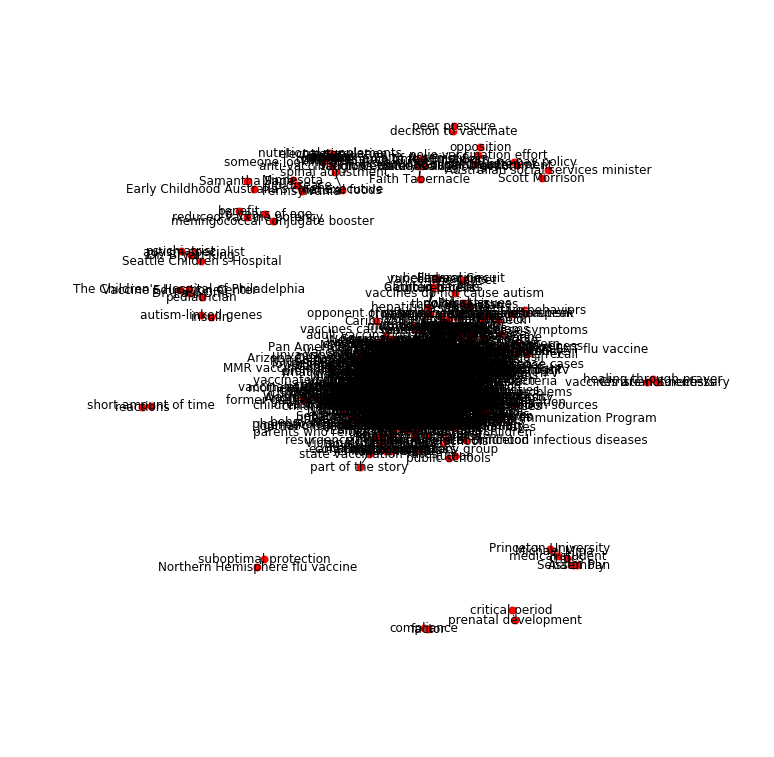

Drawing component of size 585:


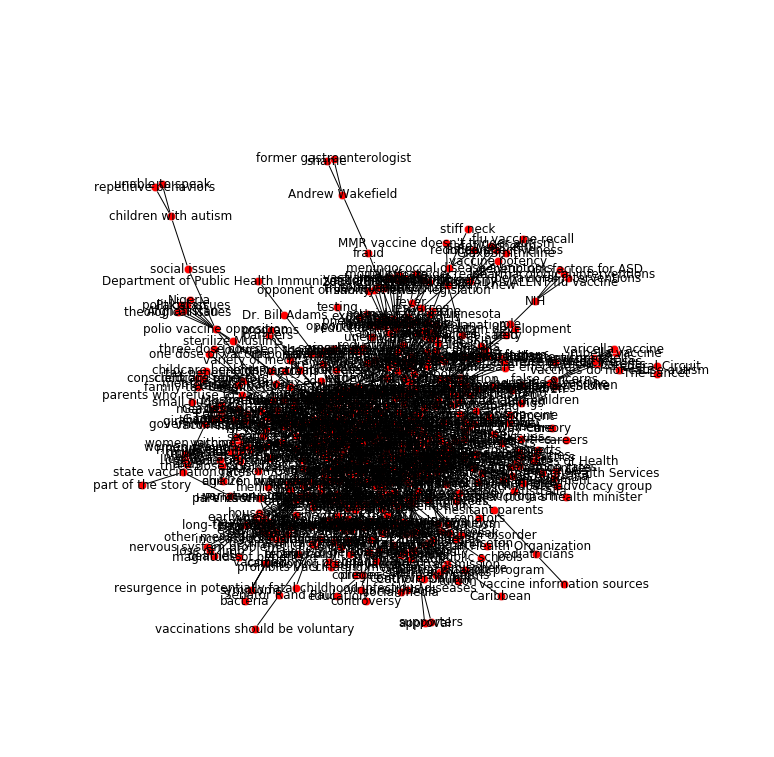

Drawing component of size 15:


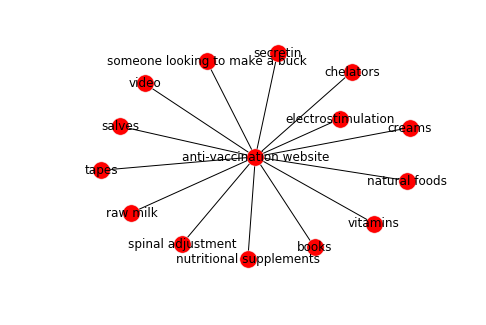

Drawing component of size 7:


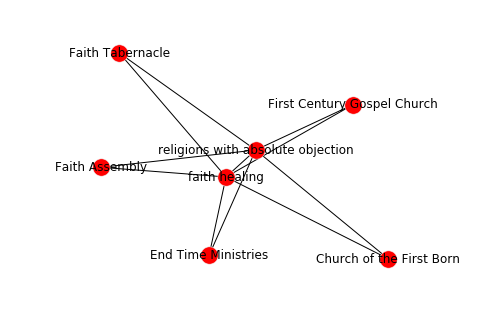

Drawing component of size 4:


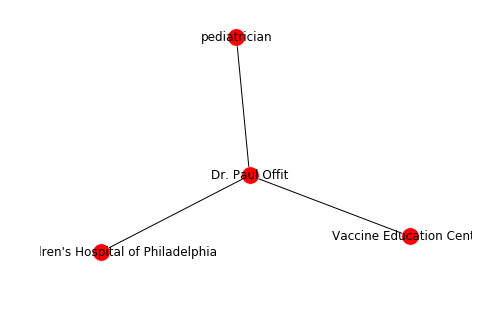

Drawing component of size 4:


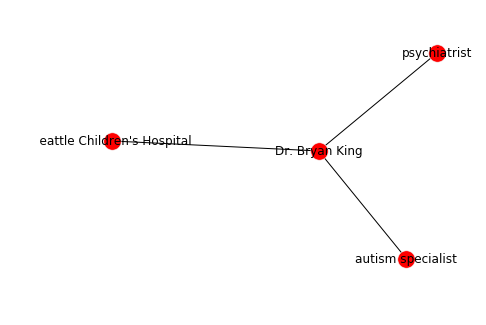

Drawing component of size 3:


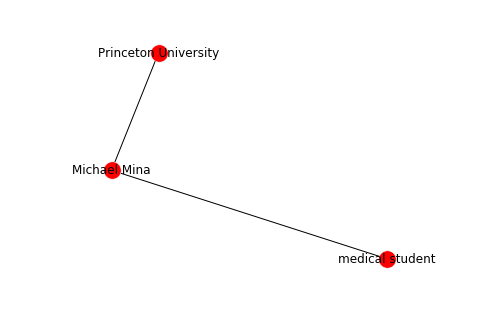

Drawing component of size 3:


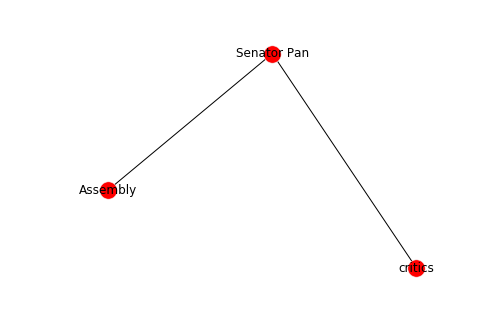

Drawing component of size 3:


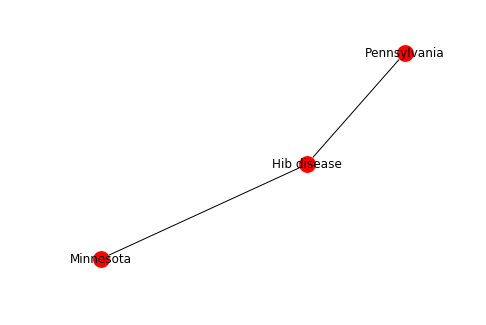

Drawing component of size 3:


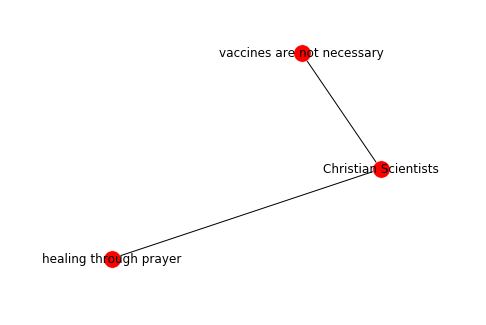

Drawing component of size 3:


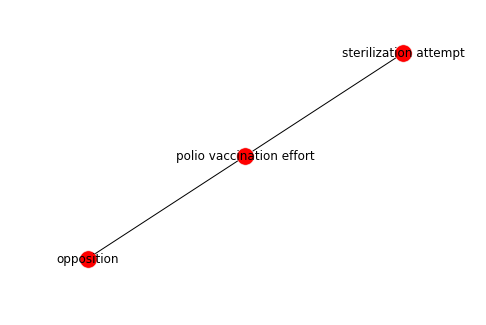

Drawing component of size 2:


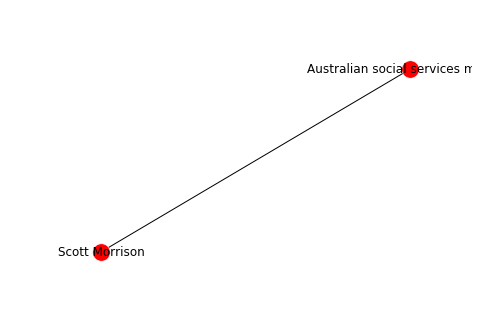

Drawing component of size 2:


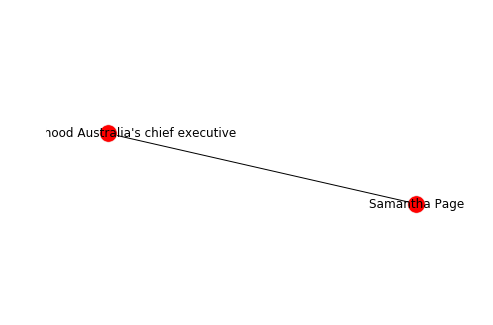

Drawing component of size 2:


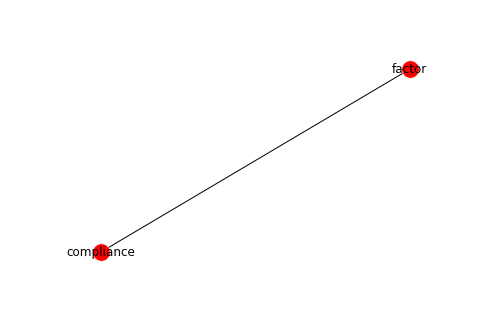

Drawing component of size 2:


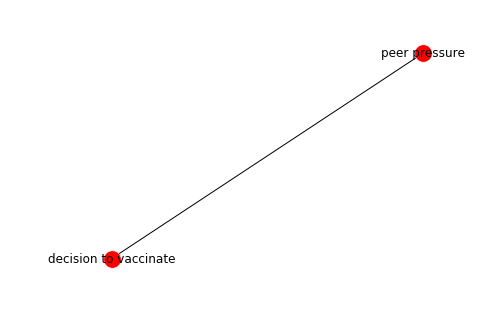

Drawing component of size 2:


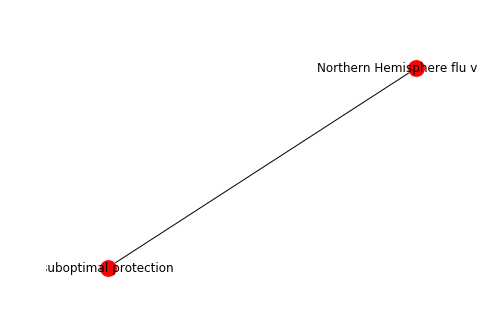

Drawing component of size 2:


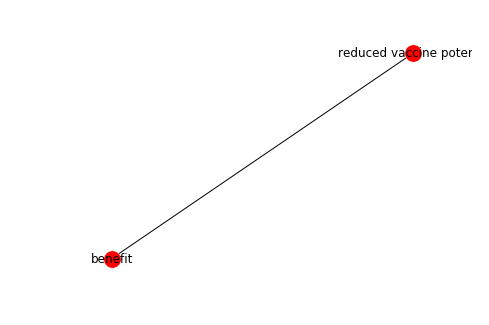

Drawing component of size 2:


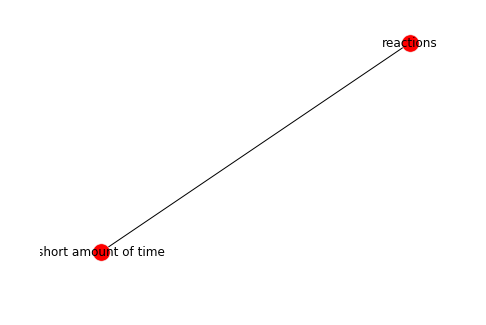

Drawing component of size 2:


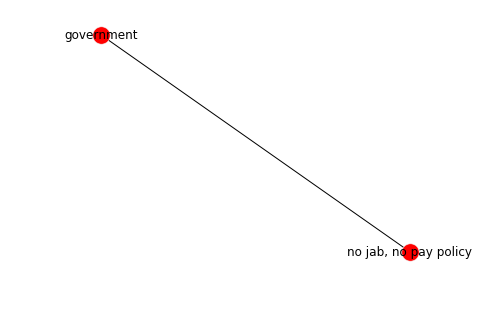

Drawing component of size 2:


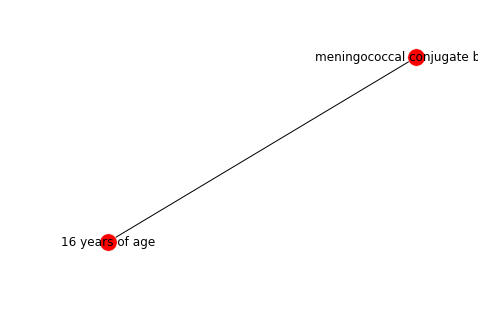

Drawing component of size 2:


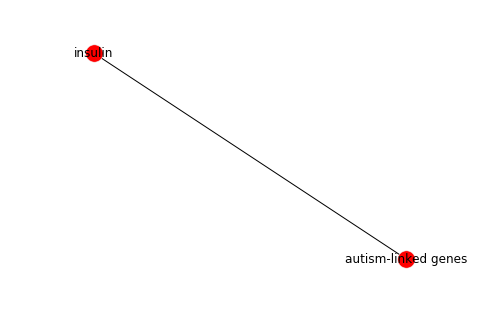

Drawing component of size 2:


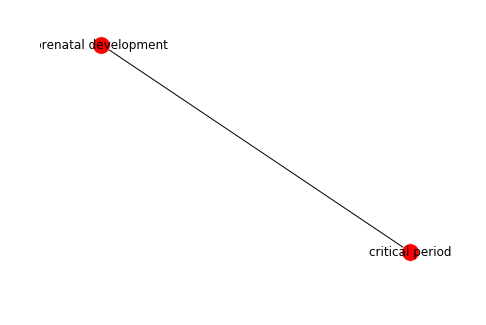

In [12]:
# UNDIRECTED network graph
describeGraph(ugraph)

Graph has 1140 edges, 652 nodes, 21 connected components

Drawing graph of size 652:


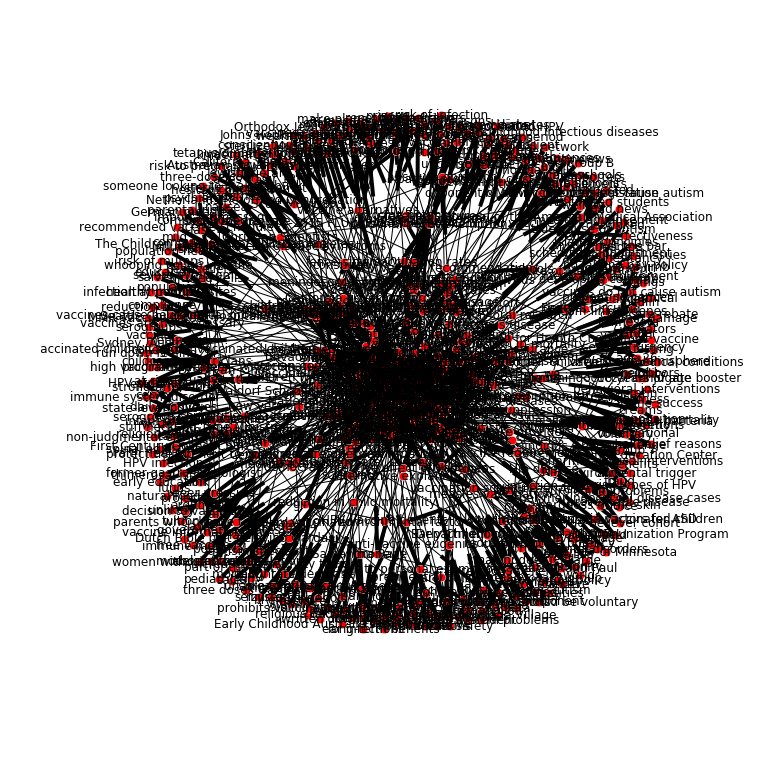

Drawing component of size 585:


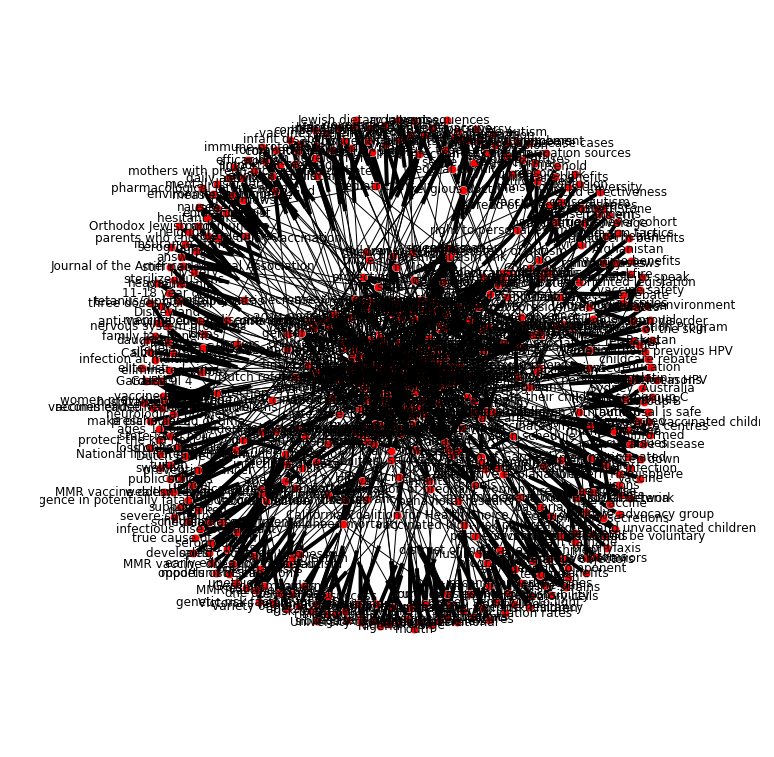

Drawing component of size 15:


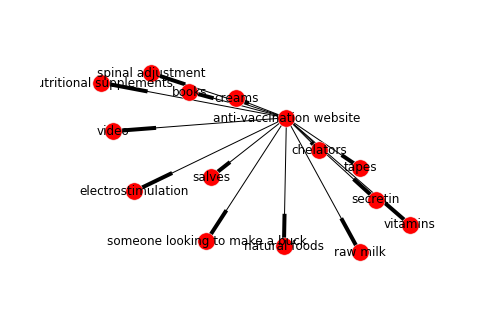

Drawing component of size 7:


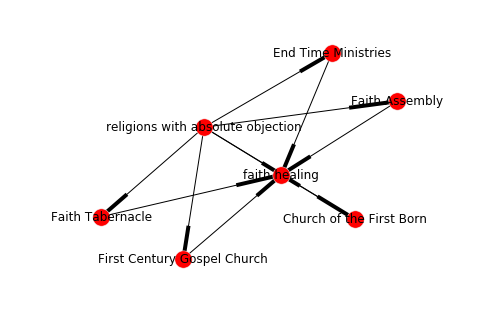

Drawing component of size 4:


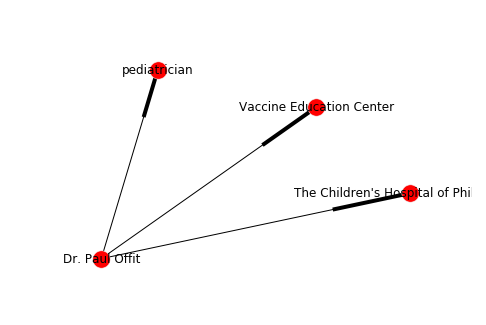

Drawing component of size 4:


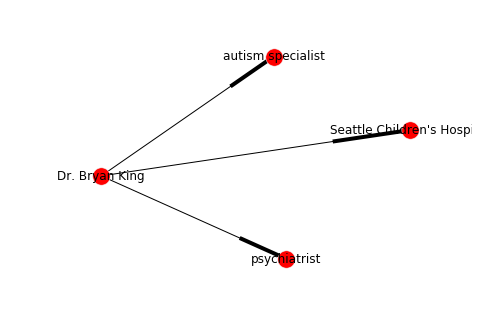

Drawing component of size 3:


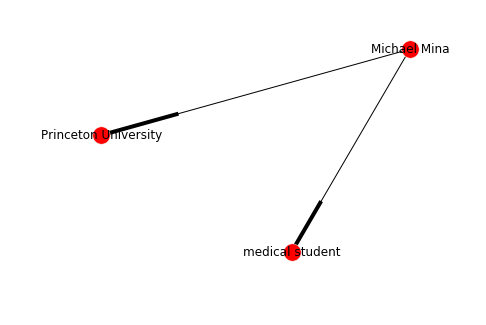

Drawing component of size 3:


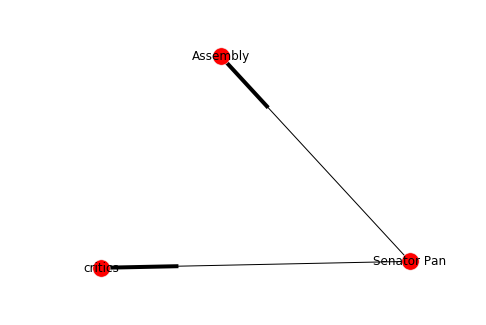

Drawing component of size 3:


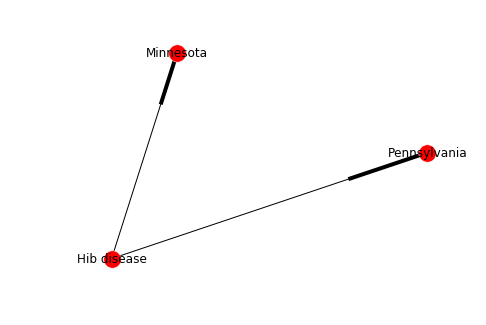

Drawing component of size 3:


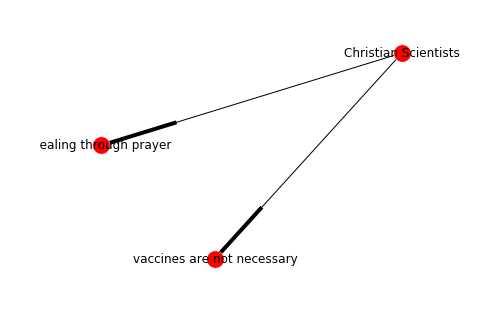

Drawing component of size 3:


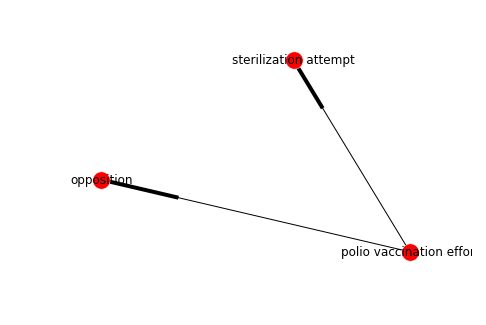

Drawing component of size 2:


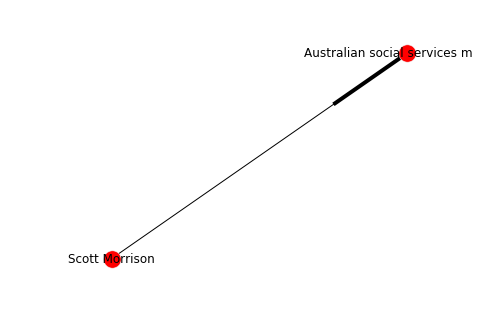

Drawing component of size 2:


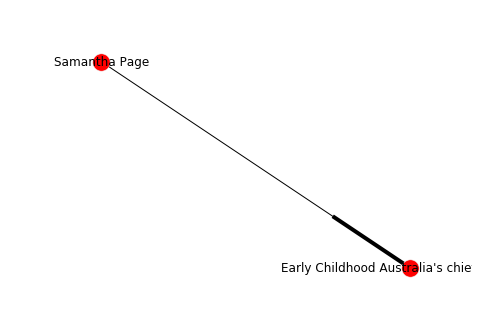

Drawing component of size 2:


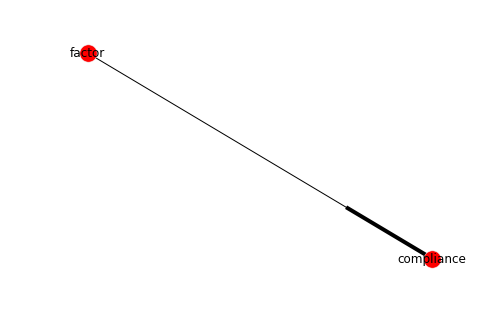

Drawing component of size 2:


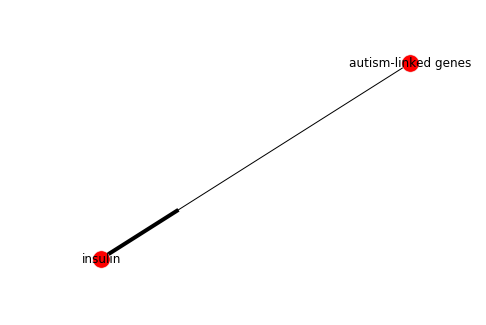

Drawing component of size 2:


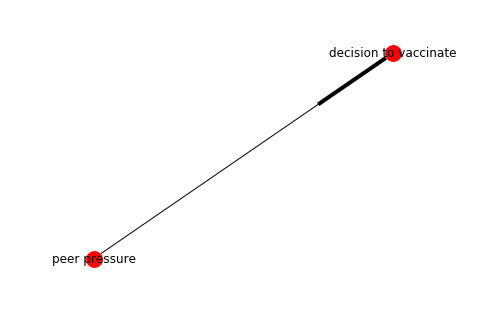

Drawing component of size 2:


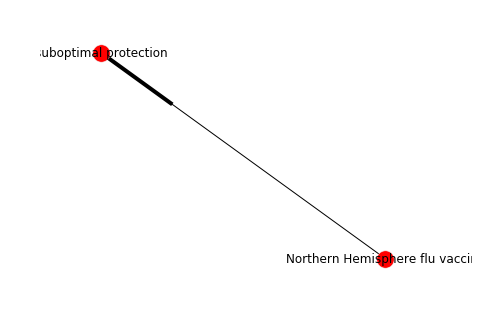

Drawing component of size 2:


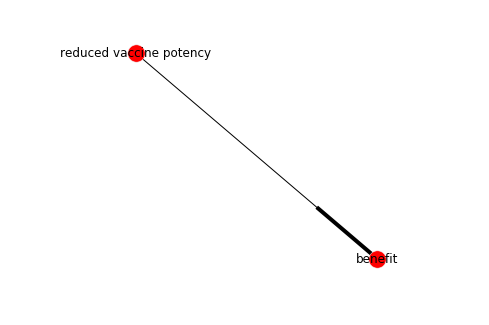

Drawing component of size 2:


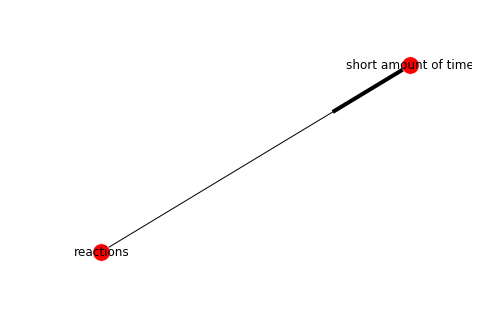

Drawing component of size 2:


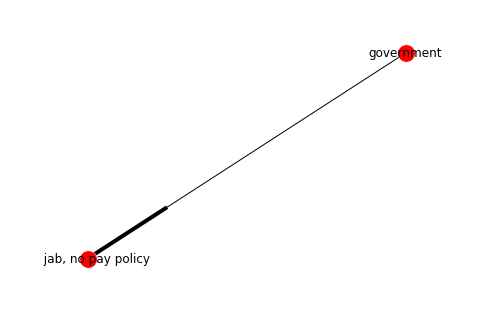

Drawing component of size 2:


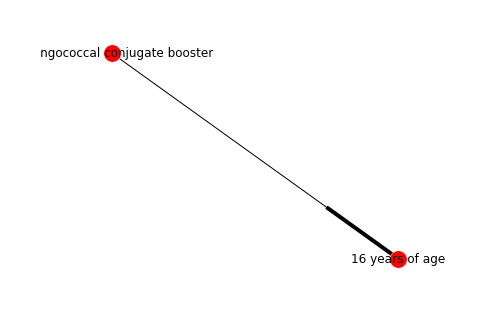

Drawing component of size 2:


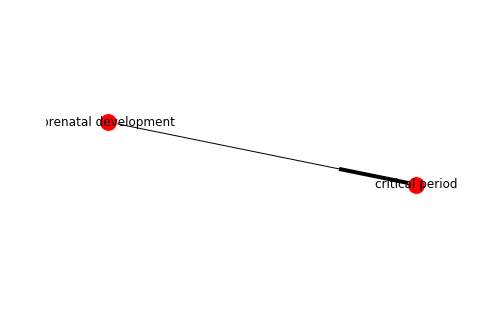

In [13]:
# DIRECTED network graph
describeGraph_d(dgraph)

## Undirected graph components

In [14]:
# list of connected components by size (undirected graph)
connected_components = [len(c) for c in sorted(nx.connected_components(ugraph), key=len, reverse=True)]

# generate connected components as subgraphs (undirected graph)
subgraphs = list(nx.connected_component_subgraphs(ugraph))

# greatest component (undirected MultiGraph)
u_Gc = max(nx.connected_component_subgraphs(ugraph), key=len)
u_Gc.name = "undirected Gc"

In [15]:
print "connected components = ", connected_components
print nx.info(u_Gc)

connected components =  [585, 15, 7, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Name: undirected Gc
Type: MultiGraph
Number of nodes: 585
Number of edges: 1088
Average degree:   3.7197


## ~~Directed graph components~~

In [18]:
# use directed dgraph
components = sorted(nx.weakly_connected_components(dgraph), key = len, reverse = True)
cc = [len(c) for c in components]

# generate connected components as subgraphs 
subgraphs = list(nx.weakly_connected_component_subgraphs(dgraph))

# greatest component
d_Gc = max(nx.weakly_connected_component_subgraphs(dgraph), key=len)
d_Gc.name = "directed Gc"

In [19]:
print "connected components = ", cc
print nx.info(d_Gc)

connected components =  [585, 15, 7, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Name: directed Gc
Type: MultiDiGraph
Number of nodes: 585
Number of edges: 1088
Average in degree:   1.8598
Average out degree:   1.8598


# 5. Greatest component graph

In [20]:
# finally, greatest components for undirected and directed graphs
print nx.info(u_Gc)
print nx.info(d_Gc)

Name: undirected Gc
Type: MultiGraph
Number of nodes: 585
Number of edges: 1088
Average degree:   3.7197
Name: directed Gc
Type: MultiDiGraph
Number of nodes: 585
Number of edges: 1088
Average in degree:   1.8598
Average out degree:   1.8598


In [21]:
# save Gc
#nx.write_gml(u_Gc, "../output/network/u_Gc_positive.gml")
#nx.write_gml(d_Gc, "../output/network/d_Gc_positive.gml")

---
# ~~6. network stats for DIRECTED GC~~

In [ ]:
# load directed Gc
Gc_files = glob('../output/network/d_Gc_positive.gml')

network_data_columns = ['name',
                    'sentiment',
                    '# nodes',
                    '# edges',
                    #'avg deg',
                    'density',
                    'deg assort coef', 
                    'avg deg cent',
                    'avg bet cent',
                    'avg clo cent',
                    'high deg cent',
                    'high bet cent',
                    'high clo cent',
                    'avg node conn',
                    '# conn comp',
                    'gc size'
                    ]
network_data = pd.DataFrame(columns = network_data_columns)

In [ ]:
# Gc_files
for graph_num, gml_graph in enumerate(Gc_files):
    graph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)
    
    # calculate variables
    sent = "pos"
    nodes = nx.number_of_nodes(graph)
    edges = nx.number_of_edges(graph)
    density = float("{0:.4f}".format(nx.density(graph)))
    avg_deg_cen = np.array(nx.degree_centrality(graph).values()).mean()
    avg_bet_cen = np.array(nx.betweenness_centrality(graph).values()).mean()
    avg_clo_cen = np.array(nx.closeness_centrality(graph).values()).mean()
    #avg_deg = float("{0:.4f}".format(in_deg + out_deg))
    avg_node_con = float("{0:.4f}".format((nx.average_node_connectivity(graph))))
    deg_assort_coeff = float("{0:.4f}".format((nx.degree_assortativity_coefficient(graph))))
    conn_comp = nx.number_weakly_connected_components(graph) # ugraph
    deg_cen = nx.degree_centrality(graph)
    bet_cen = nx.betweenness_centrality(graph)
    clo_cen = nx.closeness_centrality(graph)
    highest_deg_cen = highest_centrality(deg_cen)
    highest_bet_cen = highest_centrality(bet_cen)
    highest_clo_cen = highest_centrality(clo_cen)
    Gc = len(max(nx.weakly_connected_component_subgraphs(graph), key=len))

    # save variables into list
    graph_values = {'name':filename,
                    'sentiment':sent,
                    '# nodes':nodes,
                    '# edges':edges,
                    #'avg deg':avg_deg,
                    'density':density,
                    'deg assort coef':deg_assort_coeff,
                    'avg deg cent':"%.4f" % avg_deg_cen,
                    'avg bet cent':"%.4f" % avg_bet_cen,
                    'avg clo cent':"%.4f" % avg_clo_cen,
                    'high deg cent':highest_deg_cen,
                    'high bet cent':highest_bet_cen,
                    'high clo cent':highest_clo_cen,
                    'avg node conn':avg_node_con,
                    '# conn comp':conn_comp,
                    'gc size':Gc
                    }
    network_data = network_data.append(graph_values, ignore_index=True)

In [ ]:
# print network data for greatest component
network_data

In [ ]:
# save
#network_data.to_csv('../output/df/d_Gc_pos.csv')

# 7. network stats for UNDIRECTED GC

In [22]:
# load UNdirected Gc
Gc_files = glob('../output/network/u_Gc_positive.gml')

network_data_columns = ['name',
                    'sentiment',
                    '# nodes',
                    '# edges',
                    #'avg deg',
                    'density',
                    'deg assort coef', 
                    'avg deg cent',
                    'avg bet cent',
                    'avg clo cent',
                    'high deg cent',
                    'high bet cent',
                    'high clo cent',
                    'avg node conn'
                    #'# conn comp',
                    #'gc size'
                    ]
network_data = pd.DataFrame(columns = network_data_columns)

In [23]:
# Gc_files
for graph_num, gml_graph in enumerate(Gc_files):
    graph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)
    
    # calculate variables
    sent = "pos"
    nodes = nx.number_of_nodes(graph)
    edges = nx.number_of_edges(graph)
    density = float("{0:.4f}".format(nx.density(graph)))
    avg_deg_cen = np.array(nx.degree_centrality(graph).values()).mean()
    avg_bet_cen = np.array(nx.betweenness_centrality(graph).values()).mean()
    avg_clo_cen = np.array(nx.closeness_centrality(graph).values()).mean()
    #avg_deg = float("{0:.4f}".format(in_deg + out_deg))
    avg_node_con = float("{0:.4f}".format((nx.average_node_connectivity(graph))))
    deg_assort_coeff = float("{0:.4f}".format((nx.degree_assortativity_coefficient(graph))))
    #conn_comp = nx.number_weakly_connected_components(graph) # ugraph
    deg_cen = nx.degree_centrality(graph)
    bet_cen = nx.betweenness_centrality(graph)
    clo_cen = nx.closeness_centrality(graph)
    highest_deg_cen = highest_centrality(deg_cen)
    highest_bet_cen = highest_centrality(bet_cen)
    highest_clo_cen = highest_centrality(clo_cen)
    #Gc = len(max(nx.weakly_connected_component_subgraphs(graph), key=len))

    # save variables into list
    graph_values = {'name':filename,
                    'sentiment':sent,
                    '# nodes':nodes,
                    '# edges':edges,
                    #'avg deg':avg_deg,
                    'density':density,
                    'deg assort coef':deg_assort_coeff,
                    'avg deg cent':"%.4f" % avg_deg_cen,
                    'avg bet cent':"%.4f" % avg_bet_cen,
                    'avg clo cent':"%.4f" % avg_clo_cen,
                    'high deg cent':highest_deg_cen,
                    'high bet cent':highest_bet_cen,
                    'high clo cent':highest_clo_cen,
                    'avg node conn':avg_node_con
                    #'# conn comp':conn_comp,
                    #'gc size':Gc
                    }
    network_data = network_data.append(graph_values, ignore_index=True)

----------
../output/network/u_Gc_positive.gml
Name: u_Gc_positive.gml
Type: MultiGraph
Number of nodes: 585
Number of edges: 1088
Average degree:   3.7197


In [24]:
# print network data for greatest component
network_data

,name,sentiment,# nodes,# edges,density,deg assort coef,avg deg cent,avg bet cent,avg clo cent,high deg cent,high bet cent,high clo cent,avg node conn
0,u_Gc_positive.gml,pos,585.0,1088.0,0.0064,-0.099,0.0064,0.0060,0.2292,"(vaccines, 0.116438356164)","(parents, 0.271838812819)","(parents, 0.368686868687)",1.3117


In [25]:
# save
#network_data.to_csv('../output/df/u_Gc_pos.csv')

---
# Gc nodes table

In [26]:
#gml_files = glob('../output/network/d_Gc_positive.gml')
gml_files = glob('../output/network/u_Gc_positive.gml')

In [27]:
# 2_node_df: list all nodes and centrality
data_columns = ['name',
                'sentiment'
                ]
data = pd.DataFrame(columns = data_columns)
#combined_df = pd.DataFrame()

In [28]:
for graph_num, gml_graph in enumerate(gml_files):
    graph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)

    # calculate variables and save into list
    sent = "pos"    
    deg_cent = nx.degree_centrality(graph)
    bet_cent = nx.betweenness_centrality(graph)
    clo_cent = nx.closeness_centrality(graph)
    graph_values = {'name':filename,
                    'sentiment':sent
                    }
    data = data.append(graph_values, ignore_index=True)

    degree = nx.degree(graph)
    deg_df = pd.DataFrame.from_dict(degree, orient = 'index')
    deg_df.columns = ['degree']
    # degree centrality
    deg_cent = nx.degree_centrality(graph)
    dc_df = pd.DataFrame.from_dict(deg_cent, orient = 'index')
    dc_df.columns = ['deg cent']
    # betweenness centrality
    bet_cent = nx.betweenness_centrality(graph)
    bc_df = pd.DataFrame.from_dict(bet_cent, orient = 'index')
    bc_df.columns = ['bet cent']
    # closeness centrality
    clo_cent = nx.closeness_centrality(graph)
    cc_df = pd.DataFrame.from_dict(clo_cent, orient = 'index')
    cc_df.columns = ['clo cent']
    # concat node frames into node_df
    frames = [deg_df, dc_df, bc_df, cc_df]
    node_df = pd.concat(frames, axis = 1)
    node_df.index.name = 'node'
    node_df = node_df.reset_index()

    values = pd.DataFrame(graph_values, columns = ('name', 'sentiment'), index = [0])
    
    # df = merges graph_values with node_df for single graph and fill NaNs
    df = pd.concat([values, node_df], axis = 1)
    df = df.fillna(method='ffill')
    #combined_df = combined_df.append(df)

----------
../output/network/u_Gc_positive.gml
Name: u_Gc_positive.gml
Type: MultiGraph
Number of nodes: 585
Number of edges: 1088
Average degree:   3.7197


In [29]:
# print positive gc nodes
df

,name,sentiment,node,degree,deg cent,bet cent,clo cent
0,u_Gc_positive.gml,pos,neighbors,1,0.001712,0.000000,0.198033
1,u_Gc_positive.gml,pos,colleges,1,0.001712,0.000000,0.204482
2,u_Gc_positive.gml,pos,influenza,2,0.003425,0.000744,0.168009
3,u_Gc_positive.gml,pos,parents of autistic children,6,0.010274,0.005560,0.265938
4,u_Gc_positive.gml,pos,religious exemption,9,0.015411,0.007146,0.269995
5,u_Gc_positive.gml,pos,results,1,0.001712,0.000000,0.215181
6,u_Gc_positive.gml,pos,no brainer,1,0.001712,0.000000,0.236725
7,u_Gc_positive.gml,pos,repetitive behaviors,1,0.001712,0.000000,0.125322
8,u_Gc_positive.gml,pos,children,31,0.053082,0.082502,0.341520
9,u_Gc_positive.gml,pos,vaccination schedule,4,0.006849,0.001338,0.260134


In [30]:
# save
##df.to_csv('../output/df/d_Gc_nodes_pos.csv')

#df.to_csv('../output/df/u_Gc_nodes_pos.csv')

---
# Cutsets

In [31]:
print "Greatest component size =", len(graph)

Greatest component size = 585


In [32]:
# returns all minimum k cutsets of an undirected graph
# i.e., the set(s) of nodes of cardinality equal to the node connectivity of G
# thus if removed, would break G into two or more connected components

#cutsets = list(nx.all_node_cuts(graph))  # must be undirected

print "Greatest component size =", len(graph)
#print "# of cutsets =", len(cutsets)

# returns a set of nodes or edges of minimum cardinality that disconnects G
min_ncut = nx.minimum_node_cut(graph)
min_ecut = nx.minimum_edge_cut(graph)

print "Min node cut =", min_ncut
print "Min edge cut =", min_ecut

# min cuts with source and target
print nx.minimum_node_cut(graph, s='vaccines', t='autism')
print nx.minimum_edge_cut(graph, s='vaccines', t='autism')

Greatest component size = 585
Min node cut = set([u'vaccine message'])
Min edge cut = set([(u'anti-vaccination', u'time')])
set([u'protective effect of vaccines', u'families', u'vaccinated children', u'MMR vaccine', u'autism risk', u'anti-vaccination', u'parents', u'genetic predisposition', u'scientists', u'children at higher risk for autism', u'children', u'Jain study'])
set([(u'vaccinated high-risk children', u'autism'), (u'genetic predisposition', u'autism'), (u'children', u'autism'), (u'MMR vaccine', u'autism'), (u'vaccines', u'autism'), (u'scientists', u'autism'), (u'anti-vaccination', u'autism'), (u'children with autistic sibling', u'autism'), (u'parents', u'autism'), (u'vaccinated children and unvaccinated children', u'autism'), (u'families', u'autism'), (u'harmful association', u'autism'), (u'protective effect of vaccines', u'autism'), (u'vaccinated children', u'autism'), (u'children at higher risk for autism', u'autism')])


In [33]:
# read edge labels in min cut for Gc
# change source and target
a = nx.minimum_edge_cut(graph, s='vaccines', t='autism')
#a = nx.minimum_edge_cut(graph)

labels = nx.get_edge_attributes(graph,'edge')
edgelabels = {}
for e in labels.keys():
    e1 = e[0:2]
    edgelabels[e1]=labels[e]

for e in a:
    if edgelabels.has_key(e):
        print e,edgelabels[e]
    else:
        rev_e = e[::-1]
        print rev_e, edgelabels[rev_e]

(u'vaccinated high-risk children', u'autism') are less likely to be diagnosed with
(u'genetic predisposition', u'autism') makes more vulnerable to
(u'children', u'autism') one in 68 kids has some form of
(u'MMR vaccine', u'autism') researchers were unable to find any association with
(u'vaccines', u'autism') cause
(u'scientists', u'autism') remains challenge for
(u'anti-vaccination', u'autism') is driven by fears that shots cause
(u'children with autistic sibling', u'autism') more likely to have
(u'parents', u'autism') who already have a child with autism seem even more concerned
(u'vaccinated children and unvaccinated children', u'autism') severity does not differ between
(u'families', u'autism') remains challenge for
(u'harmful association', u'autism') none between MMR vaccine and
(u'protective effect of vaccines', u'autism') may protect children from
(u'vaccinated children', u'autism') are somewhat less likely to be diagnosed with
(u'children at higher risk for autism', u'autism') a

- - -

# full network node centrality

In [34]:
# make sure you're using the right graph
print "gml_files = ", gml_files
print "gml_graph = ", gml_graph

gml_files =  ['../output/network/u_Gc_positive.gml']
gml_graph =  ../output/network/u_Gc_positive.gml


In [35]:
# FULL UNDIRECTED
graph = nx.read_gml('../output/network/u_pos.gml')  

## graph = nx.read_gml('../output/network/article_pos1.gml')  # full network directed

print nx.info(graph)

Name: article_pos1.gml
Type: MultiGraph
Number of nodes: 652
Number of edges: 1140
Average degree:   3.4969


In [36]:
# degree centrality
dc = nx.degree_centrality(graph)
dc_df = pd.DataFrame.from_dict(dc, orient = 'index')
dc_df.columns = ['degree cent']
dc_df = dc_df.sort_values(by = ['degree cent'])
#dc_df

# betweenness centrality
bc = nx.betweenness_centrality(graph)
bc_df = pd.DataFrame.from_dict(bc, orient = 'index')
bc_df.columns = ['betweenness cent']
bc_df = bc_df.sort_values(by = ['betweenness cent'])
#bc_df

# closeness centrality
cc = nx.closeness_centrality(graph)
cc_df = pd.DataFrame.from_dict(cc, orient = 'index')
cc_df.columns = ['closeness cent']
cc_df = cc_df.sort_values(by = ['closeness cent'])
#cc_df

In [37]:
dc_df

,degree cent
neighbors,0.001536
arm,0.001536
elite list,0.001536
sex,0.001536
testing,0.001536
free vaccine,0.001536
Caribbean,0.001536
medical law,0.001536
strong-arm tactics,0.001536
gift from God,0.001536


In [38]:
bc_df

,betweenness cent
neighbors,0.000000
public schools,0.000000
behavioral research,0.000000
diarrhea deaths,0.000000
efficacious,0.000000
Early Childhood Australia's chief executive,0.000000
arm,0.000000
elite list,0.000000
sex,0.000000
testing,0.000000


In [39]:
cc_df

,closeness cent
meningococcal conjugate booster,0.001536
autism-linked genes,0.001536
benefit,0.001536
short amount of time,0.001536
critical period,0.001536
16 years of age,0.001536
prenatal development,0.001536
factor,0.001536
government,0.001536
insulin,0.001536


# Gc node centrality

In [40]:
# GC undirected
graph = nx.read_gml('../output/network/u_Gc_positive.gml')  

## graph = nx.read_gml('../output/network/d_Gc_positive.gml')  # gc directed

print nx.info(graph)

Name: undirected Gc
Type: MultiGraph
Number of nodes: 585
Number of edges: 1088
Average degree:   3.7197


In [41]:
# degree centrality
dc = nx.degree_centrality(graph)
dc_df = pd.DataFrame.from_dict(dc, orient = 'index')
dc_df.columns = ['degree cent']
dc_df = dc_df.sort_values(by = ['degree cent'])
#dc_df

# betweenness centrality
bc = nx.betweenness_centrality(graph)
bc_df = pd.DataFrame.from_dict(bc, orient = 'index')
bc_df.columns = ['betweenness cent']
bc_df = bc_df.sort_values(by = ['betweenness cent'])
#bc_df

# closeness centrality
cc = nx.closeness_centrality(graph)
cc_df = pd.DataFrame.from_dict(cc, orient = 'index')
cc_df.columns = ['closeness cent']
cc_df = cc_df.sort_values(by = ['closeness cent'])
#cc_df

In [42]:
dc_df

,degree cent
neighbors,0.001712
Merck,0.001712
"Sydney, Australia",0.001712
false concerns,0.001712
prophylaxis,0.001712
India,0.001712
German measles,0.001712
revaccinated,0.001712
measles experience,0.001712
programs,0.001712


In [43]:
bc_df

,betweenness cent
neighbors,0.000000
threat,0.000000
backfire,0.000000
wealthy regions,0.000000
benefits,0.000000
arm,0.000000
partial protection,0.000000
voluntary,0.000000
members,0.000000
diarrhea deaths,0.000000


In [44]:
cc_df

,closeness cent
unable to speak,0.125322
repetitive behaviors,0.125322
The Lancet,0.133516
Federal Circuit,0.133516
flu vaccine recall,0.137089
rubella vaccine,0.138323
varicella vaccine,0.138323
former gastroenterologist,0.141097
shame,0.141097
children with autism,0.143243
